4.1 – Importação das bibliotecas

In [8]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas carregadas!")


Bibliotecas carregadas!


4.2 – Carregamento e visualização do conjunto de dados

O conjunto de dados contém informações sobre estudantes, incluindo características acadêmicas, comportamentais e demográficas, utilizadas para prever o desempenho final.


In [9]:
df = pd.read_csv("../data/students_clean.csv")

df = df.dropna()
df.head()


,student_id,age,gender,parental_education,study_hours_week,attendance_rate,extracurricular,sleep_hours,previous_scores,tutoring,internet_quality,family_income,health_status,final_grade,study_efficiency,sleep_quality
0,STD01416,0.175417,5,8,-0.974905,1.029991,5,-0.428905,-0.869233,3,6,0.808160,6,-0.903313,-0.013391,-0.428905
1,STD01345,-1.128525,5,8,0.715019,-0.084645,5,0.980578,-0.772277,3,6,0.808160,6,0.853169,-0.041061,0.980578
2,STD01705,1.479359,5,11,0.080192,0.008848,5,-0.333786,1.580030,3,6,0.808160,6,1.064648,0.250610,-0.333786
3,STD00299,-0.259230,3,8,-1.364208,0.903257,5,0.003452,-0.701762,5,8,-0.472043,4,-0.706652,-0.018684,0.003452
4,STD01762,-1.128525,3,8,-1.289001,-0.955162,5,0.928696,-0.363515,3,8,0.808160,4,-1.191570,-0.021946,0.928696


4.3 – Separação entre variáveis explicativas e variável alvo

Features (X): informações do estudante

Target (y): desempenho final (nota final ou pontuação)

In [10]:
X = df.drop(columns=["final_grade"])
y = df["final_grade"]


4.4 – Carregamento da divisão dos dados (Etapa 3)

Mesmo padrão utilizado anteriormente para garantir reprodutibilidade.

In [13]:
from sklearn.model_selection import train_test_split

# Primeiro split: treino + teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Segundo split: treino + validação
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

print("✅ Split realizado com sucesso:")
print("Treino:", X_train.shape)
print("Validação:", X_val.shape)
print("Teste:", X_test.shape)



✅ Split realizado com sucesso:
Treino: (1506, 15)
Validação: (502, 15)
Teste: (502, 15)


4.5 – Carregamento do modelo baseline

Modelo baseline treinado na Etapa 3 utilizando Regressão Linear, servindo como referência de desempenho.

In [18]:
modelo_baseline = joblib.load("modelo_views.pkl")
modelo_baseline


{'preprocess': ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                  ['student_id']),
                                 ('num', 'passthrough',
                                  ['age', 'gender', 'parental_education',
                                   'study_hours_week', 'attendance_rate',
                                   'extracurricular', 'sleep_hours',
                                   'previous_scores', 'tutoring',
                                   'internet_quality', 'family_income',
                                   'health_status', 'study_efficiency',
                                   'sleep_quality'])]),
 'model': LinearRegression()}

4.6 – Avaliação do modelo baseline (validação)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "modelo_students.pkl")



['modelo_students.pkl']

4.7 – Definição do espaço de busca de hiperparâmetros

Será utilizado o Random Forest Regressor, por sua capacidade de capturar relações não lineares no desempenho dos estudantes.

In [22]:
param_grid = {
    "model__n_estimators": [100, 200, 300, 400],
    "model__max_depth": [5, 10, 15, 20, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__bootstrap": [True, False],
}


4.8 – Execução do Randomized Search

In [23]:
pipeline = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(random_state=42))
])

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=20,
    cv=3,
    scoring="neg_mean_absolute_error",
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__bootstrap': [True, False], 'model__max_depth': [5, 10, ...], 'model__min_samples_leaf': [1, 2, ...], 'model__min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


 Análise da matriz de correlação

Heatmap da matriz de correlação entre variáveis numéricas do conjunto de estudantes.
Essa análise permite identificar:

#Relações fortes entre estudo, presença e nota final

#Possíveis redundâncias

#Indícios de multicolinearidade

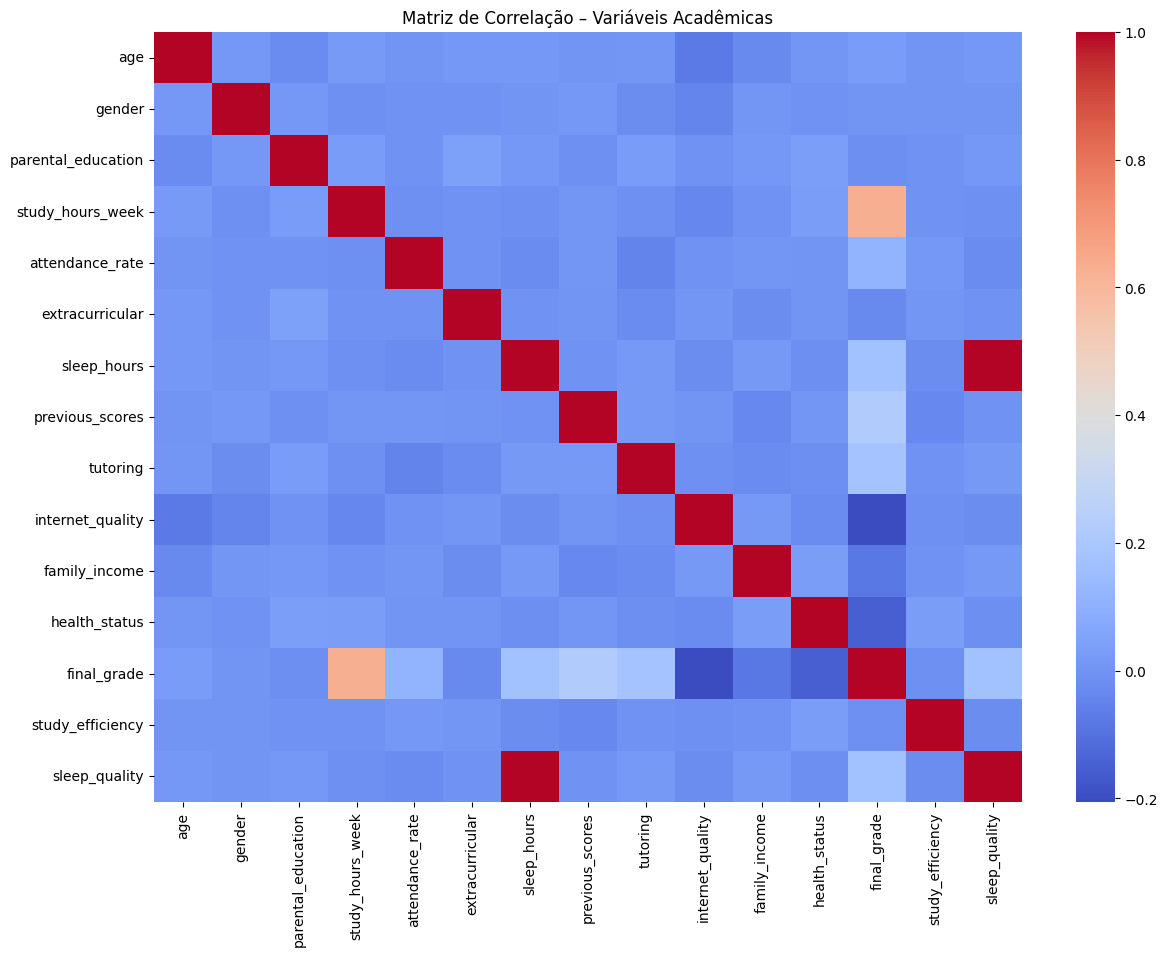

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="coolwarm",
    annot=False
)
plt.title("Matriz de Correlação – Variáveis Acadêmicas")
plt.show()



4.9 – Avaliação do modelo otimizado (validação)

In [26]:
best_model = random_search.best_estimator_

pred_val_opt = best_model.predict(X_val)

mae_opt = mean_absolute_error(y_val, pred_val_opt)
rmse_opt = np.sqrt(mean_squared_error(y_val, pred_val_opt))
r2_opt = r2_score(y_val, pred_val_opt)

print("📌 Desempenho do Modelo Otimizado (Validação):")
print(f"MAE:  {mae_opt:.2f}")
print(f"RMSE: {rmse_opt:.2f}")
print(f"R²:   {r2_opt:.4f}")


📌 Desempenho do Modelo Otimizado (Validação):
MAE:  0.46
RMSE: 0.61
R²:   0.6353


4.10 – Treinamento do modelo final (treino + validação)

In [27]:
X_train_final = pd.concat([X_train, X_val], axis=0)
y_train_final = pd.concat([y_train, y_val], axis=0)

best_params = random_search.best_params_

modelo_final = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=best_params["model__n_estimators"],
        max_depth=best_params["model__max_depth"],
        min_samples_split=best_params["model__min_samples_split"],
        min_samples_leaf=best_params["model__min_samples_leaf"],
        bootstrap=best_params["model__bootstrap"],
        random_state=42
    ))
])

modelo_final.fit(X_train_final, y_train_final)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


4.11 – Avaliação final no conjunto de teste

In [28]:
pred_test = modelo_final.predict(X_test)

mae_test = mean_absolute_error(y_test, pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
r2_test = r2_score(y_test, pred_test)

print("📌 Desempenho Final no TESTE:")
print(f"MAE  = {mae_test:.4f}")
print(f"RMSE = {rmse_test:.4f}")
print(f"R²   = {r2_test:.4f}")


📌 Desempenho Final no TESTE:
MAE  = 0.4345
RMSE = 0.5782
R²   = 0.6332


4.12 – Salvamento do modelo final

In [29]:
os.makedirs("../models", exist_ok=True)
joblib.dump(modelo_final, "../models/modelo_final_students.joblib")

print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!
